In [1]:
import zipfile,os
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



# LOAD DATA

In [2]:
local_zip = '../Data/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'rps-cv-images')
valid_dir = os.path.join(base_dir,'rps-cv-images')

# SPLIT DATA

In [3]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.4)
test_datagen = ImageDataGenerator(
              rescale = 1./225,
              validation_split = 0.4)


In [4]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (100,150),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training'
)

valid_data = test_datagen.flow_from_directory(
    valid_dir,
    target_size = (100,150),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# BUILD THE MODEL

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 148, 16)       448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 74, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 49, 74, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 72, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 36, 16)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 23, 36, 16)        0

In [7]:
model.compile(
    loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy']
)

# MODEL TRAINING

In [8]:
model.fit(
    train_data,
      steps_per_epoch=25,
      epochs=20,
      validation_data=valid_data,
      validation_steps=5,
      verbose=2
)

Epoch 1/20


25/25 - 16s - loss: 1.1370 - accuracy: 0.3187 - val_loss: 1.0961 - val_accuracy: 0.3313 - 16s/epoch - 655ms/step
Epoch 2/20
25/25 - 9s - loss: 1.0819 - accuracy: 0.3338 - val_loss: 1.0617 - val_accuracy: 0.3250 - 9s/epoch - 347ms/step
Epoch 3/20
25/25 - 7s - loss: 1.0014 - accuracy: 0.4688 - val_loss: 0.9370 - val_accuracy: 0.5938 - 7s/epoch - 269ms/step
Epoch 4/20
25/25 - 6s - loss: 0.8412 - accuracy: 0.6195 - val_loss: 0.7994 - val_accuracy: 0.5250 - 6s/epoch - 255ms/step
Epoch 5/20
25/25 - 6s - loss: 0.6636 - accuracy: 0.7390 - val_loss: 0.4689 - val_accuracy: 0.8750 - 6s/epoch - 231ms/step
Epoch 6/20
25/25 - 5s - loss: 0.5532 - accuracy: 0.8078 - val_loss: 0.4794 - val_accuracy: 0.8500 - 5s/epoch - 217ms/step
Epoch 7/20
25/25 - 6s - loss: 0.4828 - accuracy: 0.8175 - val_loss: 0.2878 - val_accuracy: 0.9250 - 6s/epoch - 229ms/step
Epoch 8/20
25/25 - 9s - loss: 0.3918 - accuracy: 0.8584 - val_loss: 0.3235 - val_accuracy: 0.8938 - 9s/epoch - 341ms/step
Epoch 9/20
25/25 - 1

# PREDICTING

In [9]:
def predict_image(image_upload, model = model):
  im = image_upload
  im_array = np.asarray(im)
  im_array = im_array*(1/225)
  im_input = tf.reshape(im_array, shape = [1, 100, 150, 3])

  predict_proba = sorted(model.predict(im_input)[0])[2]
  predict_class = np.argmax(model.predict(im_input))

  if predict_class == 0:
      predict_label = 'Paper'
  elif predict_class == 1:
      predict_label = 'Rock'
  else:
      predict_label = 'Scissor'

  print('\n')
  plt.show()
  print("\nImage prediction result: ", predict_label)
  print("Probability: ", round(predict_proba*100,2), "%")
  print('\n')

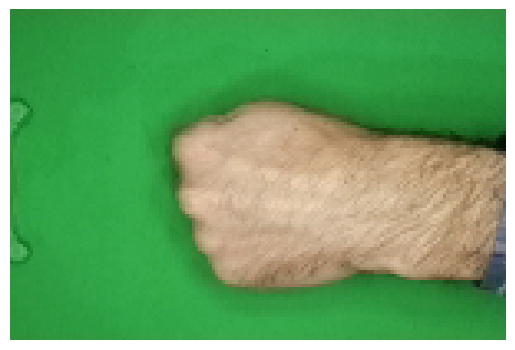

1/1 [==============================] - 0s 27ms/step



Image prediction result:  Rock
Probability:  81.01 %




In [10]:
img_path = '../Image Predict/Zz52yCODsLplv7rK.png'
img = image.load_img(img_path, target_size=(100, 150))

plt.imshow(img)
plt.axis('off')
plt.show()

predict_image(img)

In [11]:
model.save('rockpaperscissors.h5')

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
